<a href="https://colab.research.google.com/github/DaniellaEl/Predictive-Model/blob/main/Data_Analysis%2C_Preprocessing%2C_Model_Training%2C_and_Evaluation_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.utils import resample

# --- 1. Data Loading and Initial Preprocessing ---

# Load the full dataset (bank-full.csv was chosen as it's the most comprehensive)

from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))

# Read the CSV
df = pd.read_csv(file_name, delimiter=';')

# Preview the data
print(df.head())

Saving bank-full.csv to bank-full.csv
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# Handle Class Imbalance using Oversampling
print("\n--- Handling Class Imbalance (Oversampling Minority Class) ---")
if 'df' in locals(): # Check if df was created
    df_majority = df[df['y'] == 'no']
    df_minority = df[df['y'] == 'yes']

    # Upsample minority class to match the majority class count
    df_minority_upsampled = resample(df_minority,
                                     replace=True,     # Sample with replacement
                                     n_samples=len(df_majority),    # Match majority class size
                                     random_state=42) # For reproducible results

    # Concatenate the majority class with the upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    print(f"Dataset shape after oversampling: {df_upsampled.shape}")
    print("Class distribution after oversampling:")
    print(df_upsampled['y'].value_counts().to_markdown(numalign="left", stralign="left"))

    # Convert target variable 'y' and other binary categorical columns to numerical (0/1)
    df_upsampled['y'] = df_upsampled['y'].apply(lambda x: 1 if x == 'yes' else 0)
    for col in ['default', 'housing', 'loan']:
        df_upsampled[col] = df_upsampled[col].apply(lambda x: 1 if x == 'yes' else 0)
    print("\nBinary categorical columns converted to 0/1.")


--- Handling Class Imbalance (Oversampling Minority Class) ---
Dataset shape after oversampling: (79844, 17)
Class distribution after oversampling:
| y   | count   |
|:----|:--------|
| no  | 39922   |
| yes | 39922   |

Binary categorical columns converted to 0/1.


In [ ]:
# --- 2. Feature Engineering ---

print("\n--- Feature Engineering ---")

# Create 'duration_zero' feature and drop original 'duration' to prevent data leakage
# 'duration' is known only after the call, so it leaks information about the outcome
df_upsampled['duration_zero'] = df_upsampled['duration'].apply(lambda x: 1 if x == 0 else 0)
df_upsampled = df_upsampled.drop('duration', axis=1)
print("Created 'duration_zero' feature and dropped original 'duration' column.")
print(f"Dataset shape after feature engineering: {df_upsampled.shape}")


--- Feature Engineering ---
Created 'duration_zero' feature and dropped original 'duration' column.
Dataset shape after feature engineering: (79844, 17)



--- Exploratory Data Analysis (EDA) ---

Descriptive Statistics for Numerical Features:
|       | age     | balance   | day     | campaign   | pdays   | previous   |
|:------|:--------|:----------|:--------|:-----------|:--------|:-----------|
| count | 79844   | 79844     | 79844   | 79844      | 79844   | 79844      |
| mean  | 41.2783 | 1560.96   | 15.5232 | 2.48799    | 52.5741 | 0.839136   |
| std   | 11.9311 | 3217.51   | 8.40298 | 2.65451    | 109.178 | 2.44804    |
| min   | 18      | -8019     | 1       | 1          | -1      | 0          |
| 25%   | 32      | 123       | 8       | 1          | -1      | 0          |
| 50%   | 39      | 557       | 15      | 2          | -1      | 0          |
| 75%   | 49      | 1757      | 21      | 3          | 68      | 1          |
| max   | 95      | 102127    | 31      | 63         | 871     | 275        |

Visualizing Distributions and Outliers for Numerical Features (Histograms & Box Plots):

Visualizing Distributions for Categorical

<ipython-input-9-616b070fc9b8>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upsampled[col], order=df_upsampled[col].value_counts().index, palette='viridis')
<ipython-input-9-616b070fc9b8>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upsampled[col], order=df_upsampled[col].value_counts().index, palette='viridis')
<ipython-input-9-616b070fc9b8>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upsampled[col], order=df_upsampled[col].value_counts().index, palette='viridis')
<ipython-input-9-616b070fc9b8>:42: Futur


Visualizing Relationship between Categorical Features and Target (Subscription Rate by Category):


<ipython-input-9-616b070fc9b8>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 7))


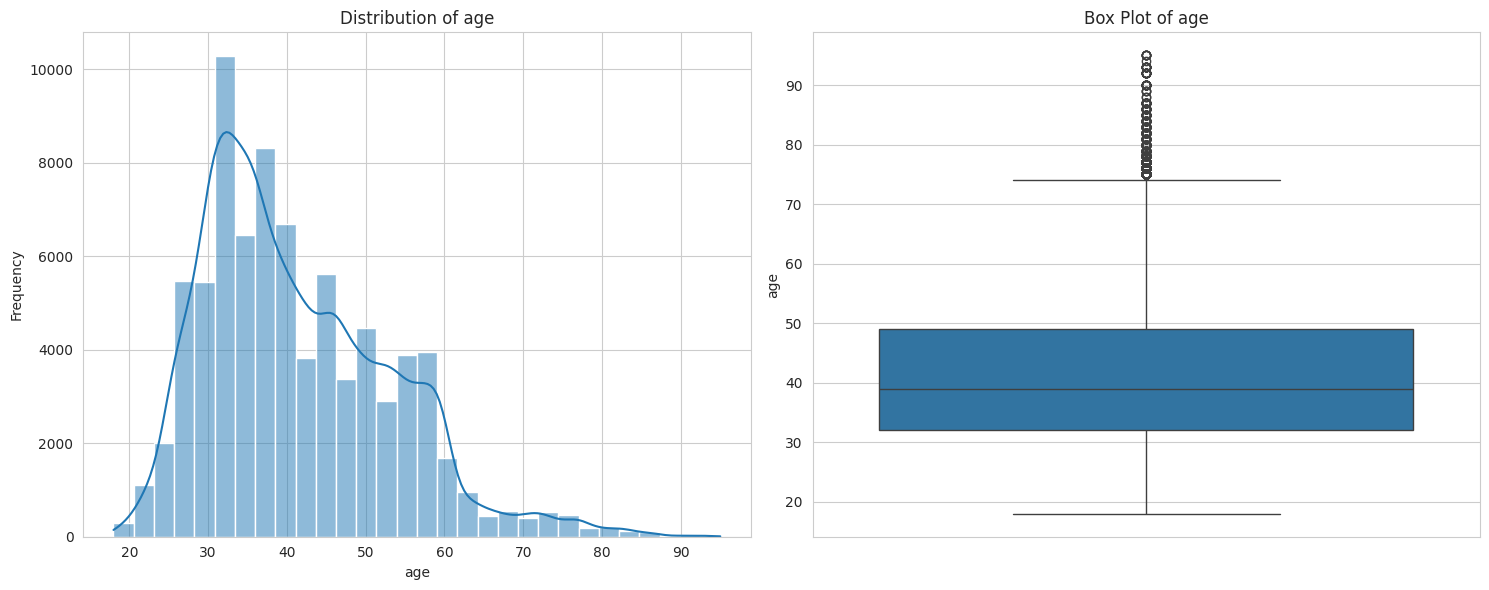

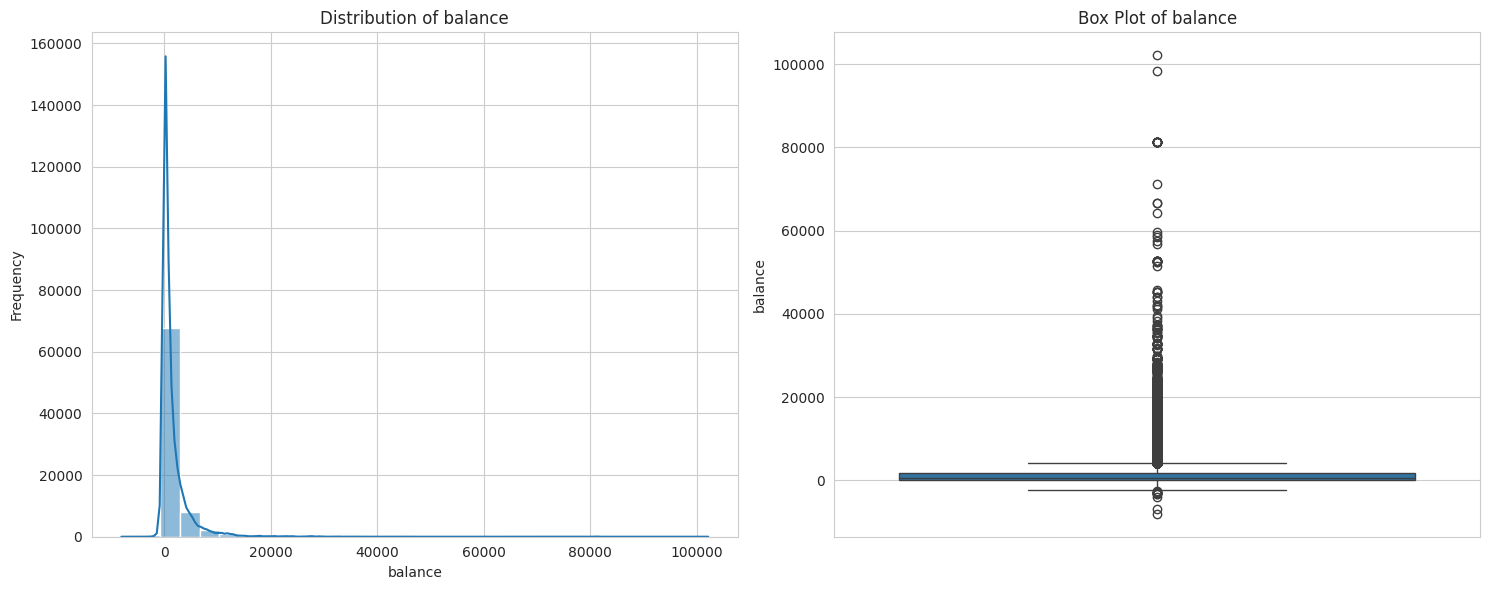

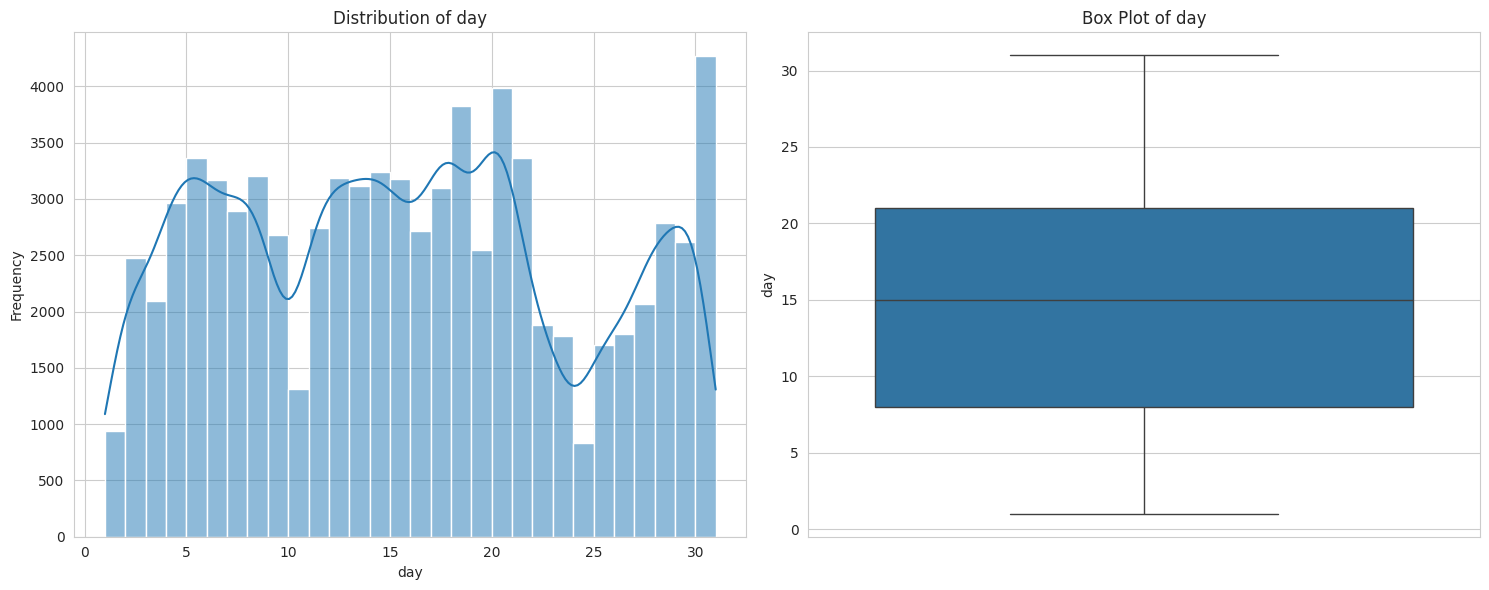

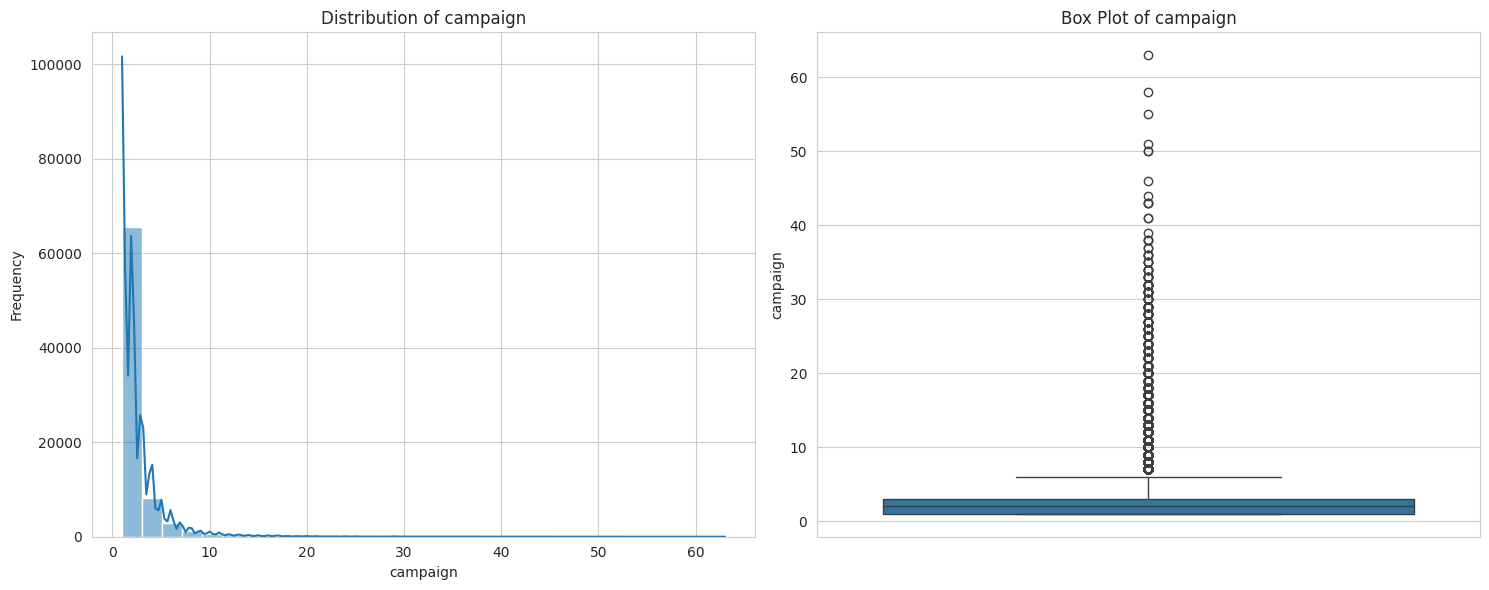

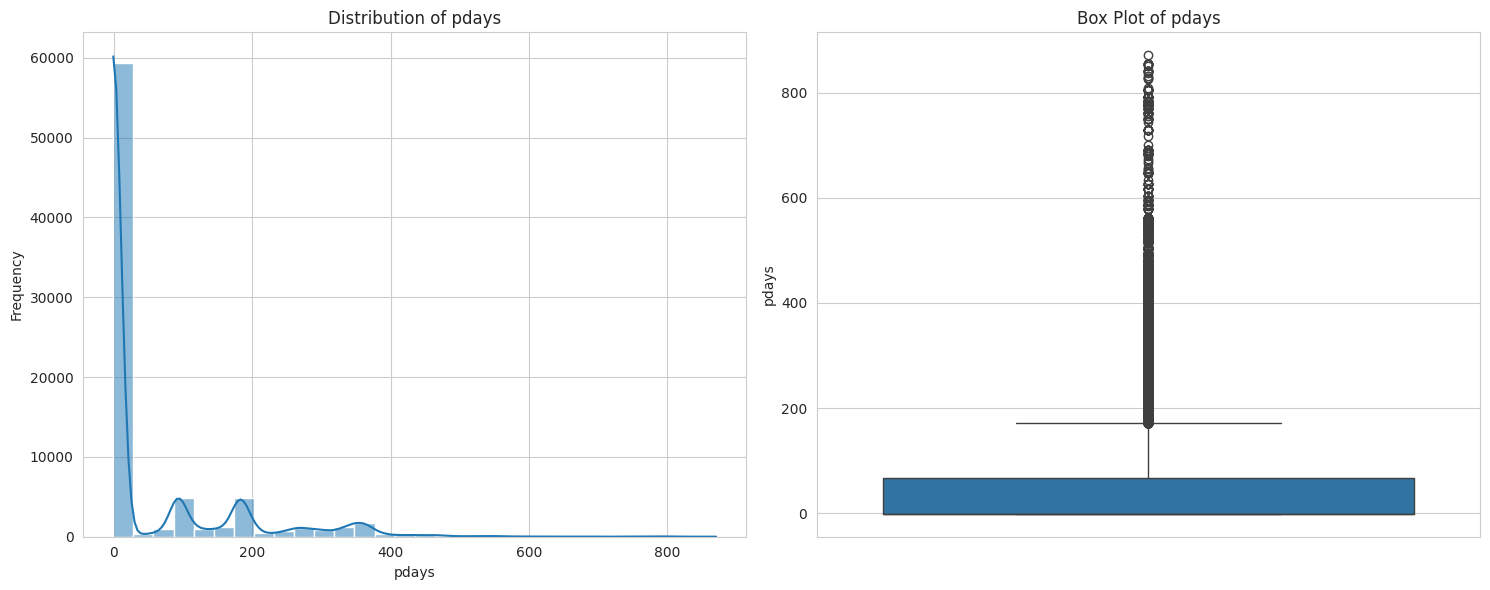

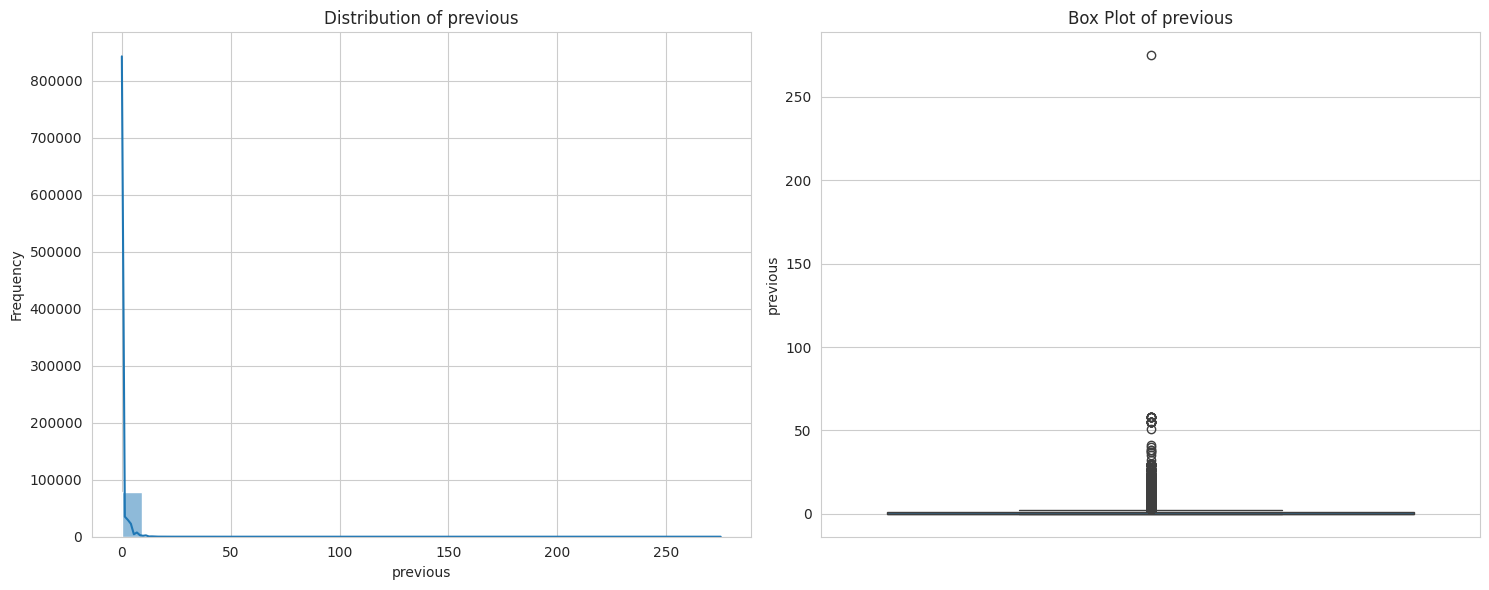

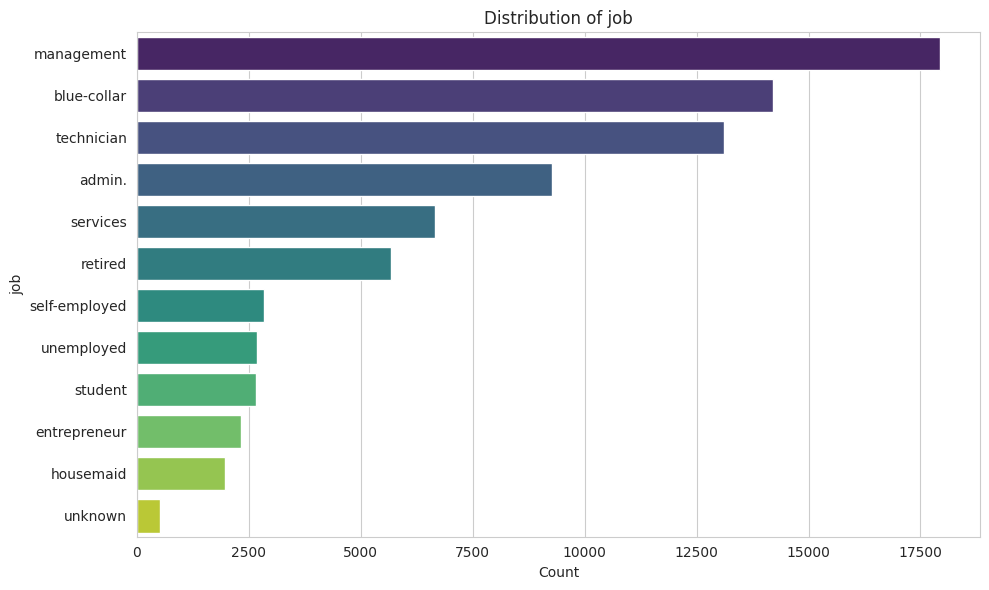

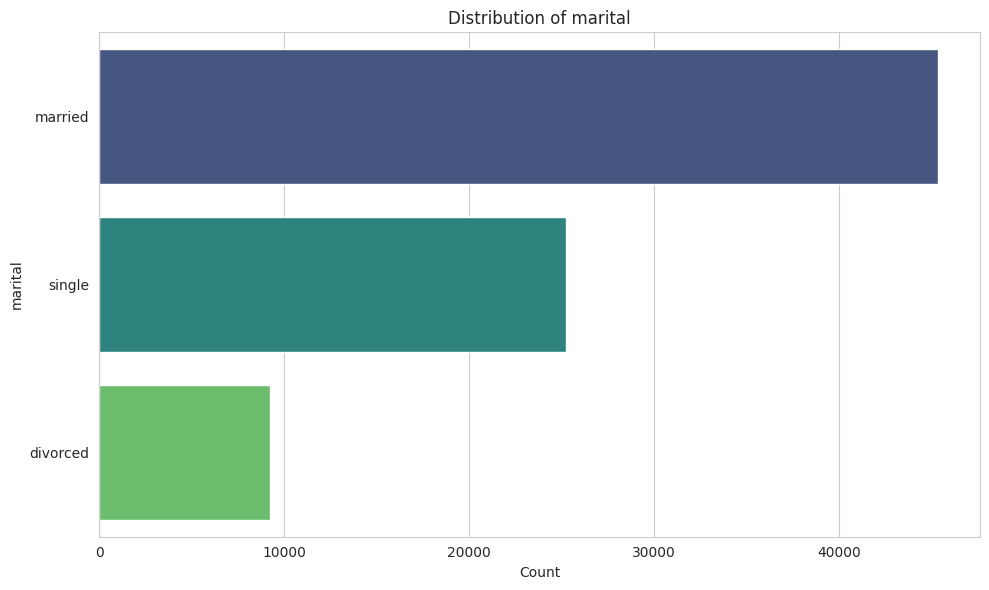

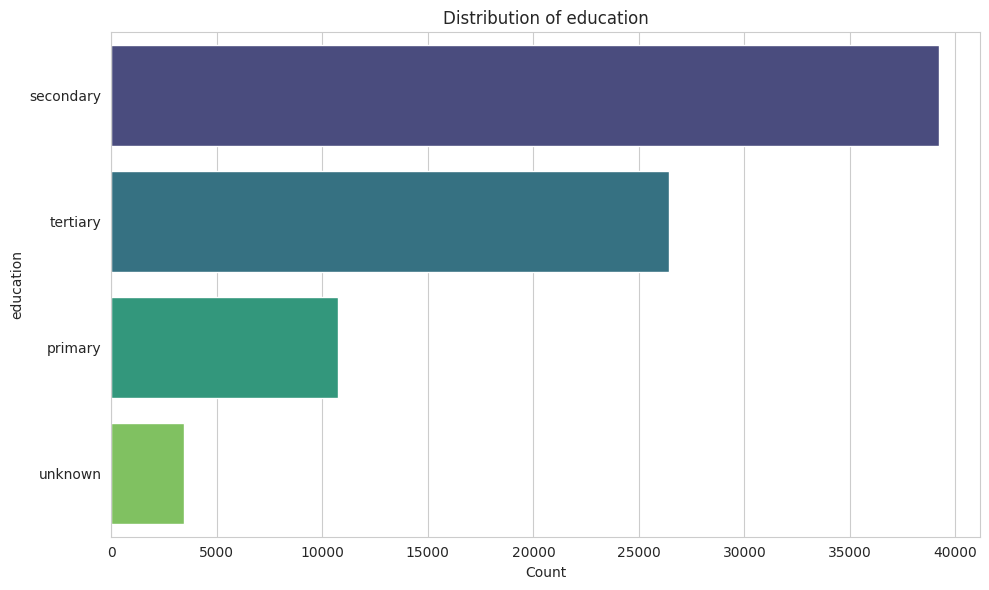

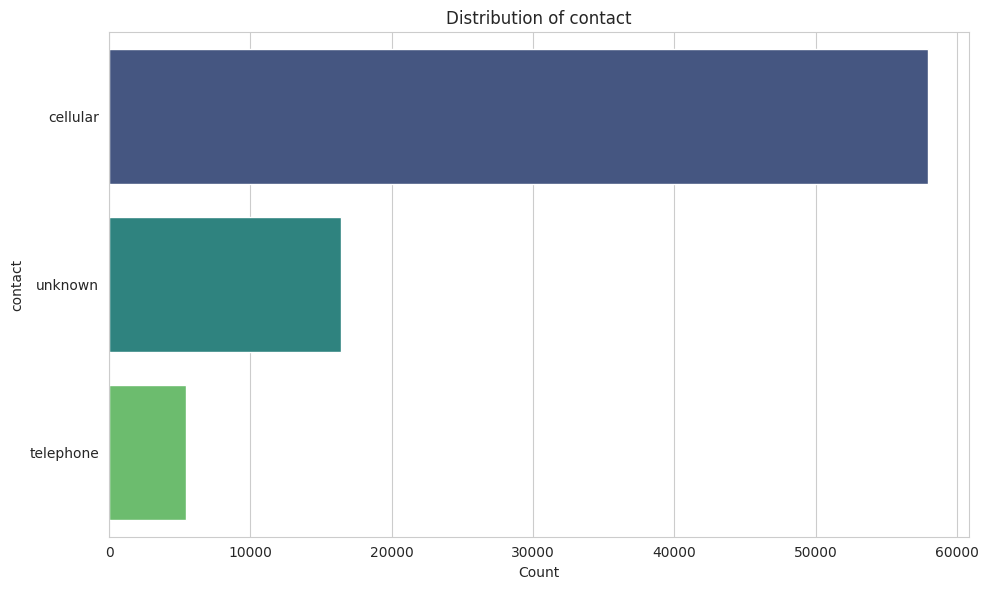

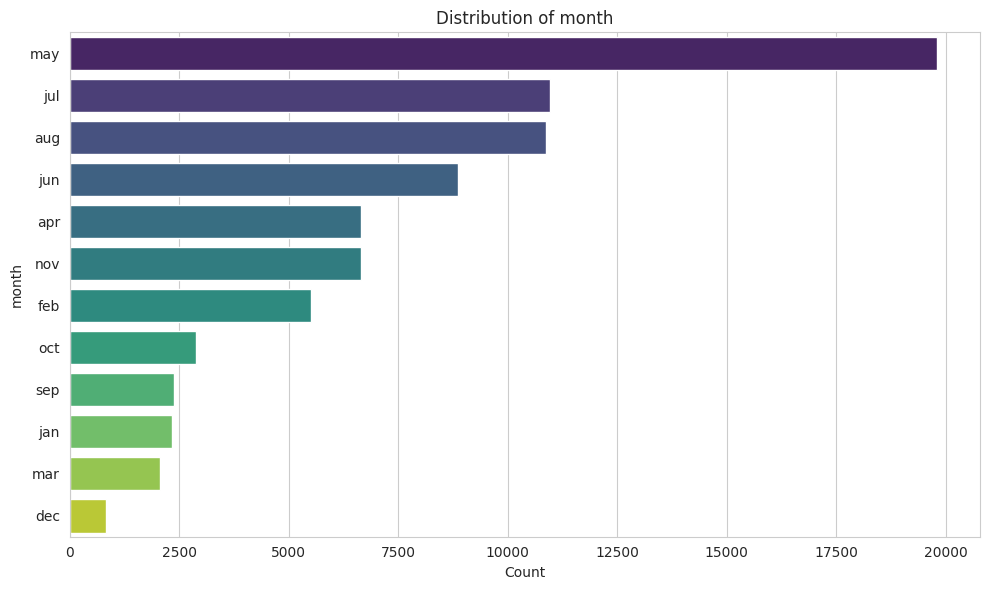

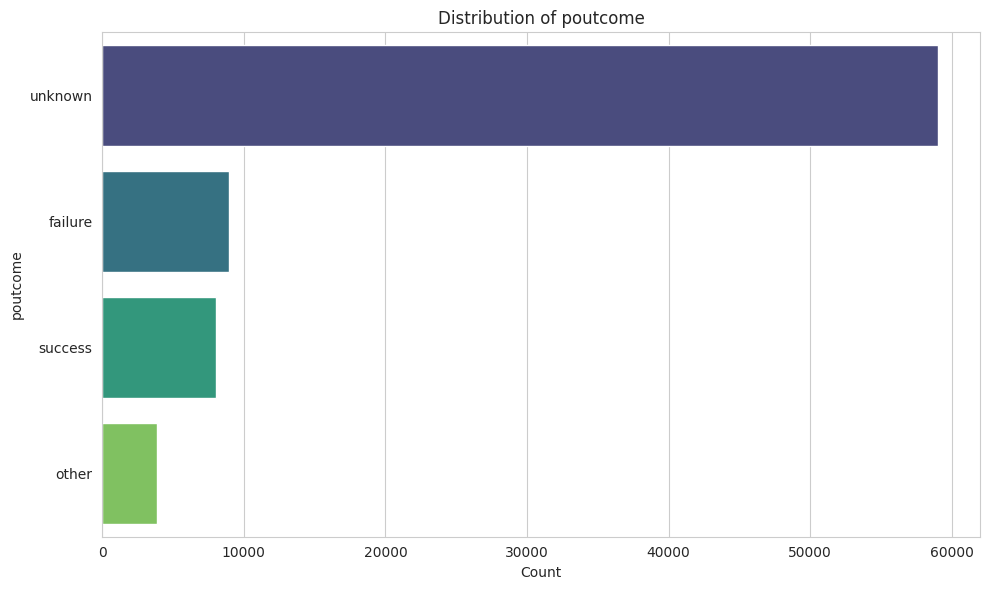

<Figure size 1200x700 with 0 Axes>

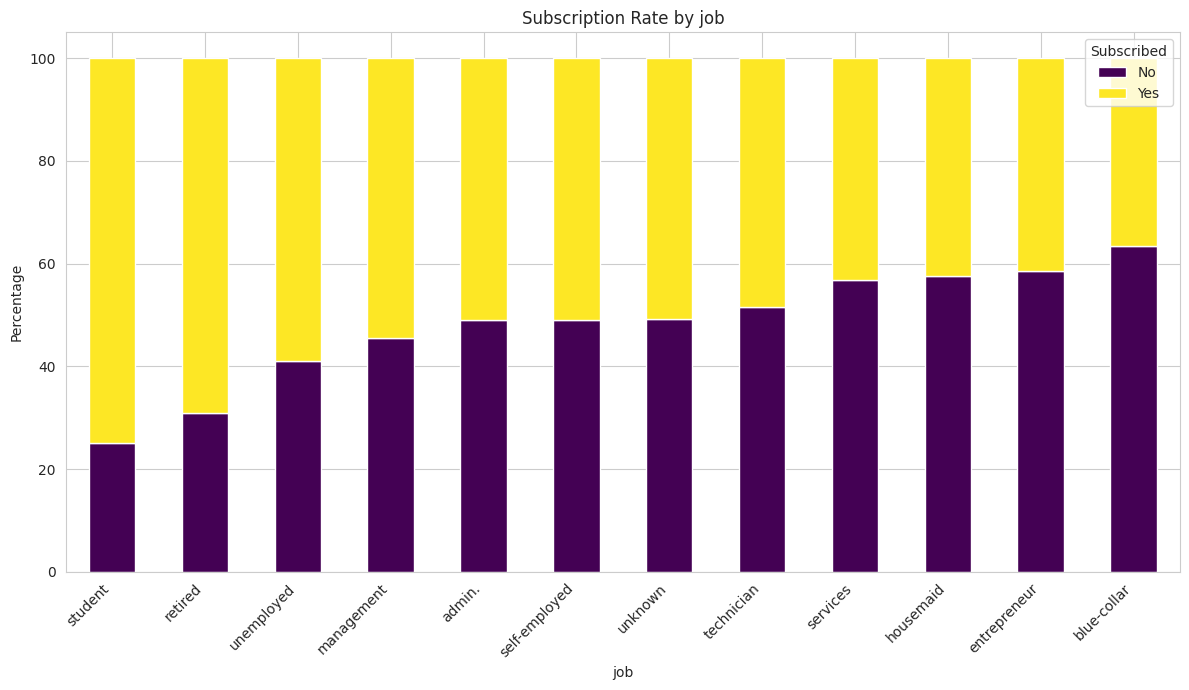

<Figure size 1200x700 with 0 Axes>

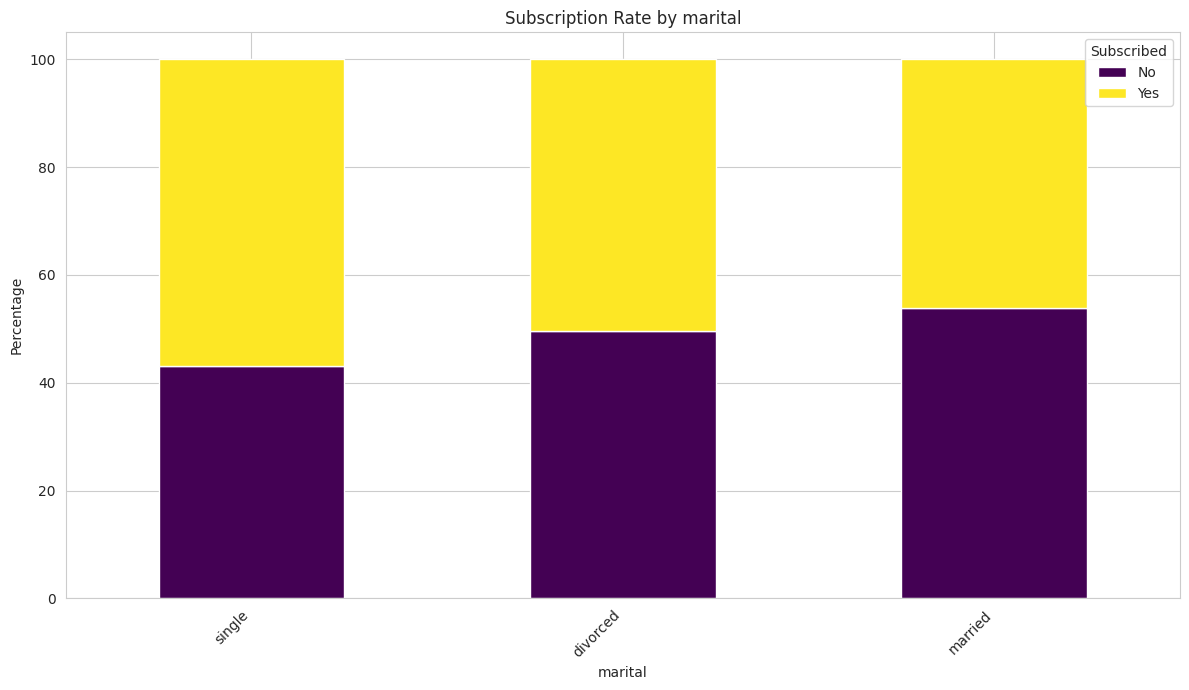

<Figure size 1200x700 with 0 Axes>

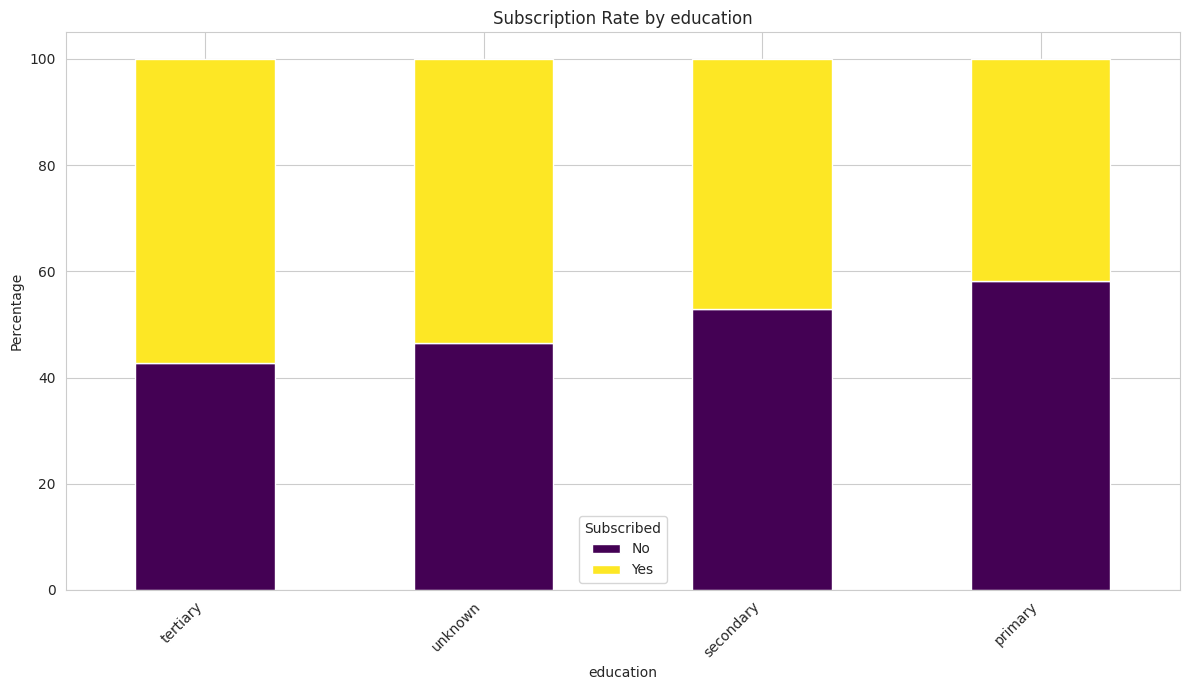

<Figure size 1200x700 with 0 Axes>

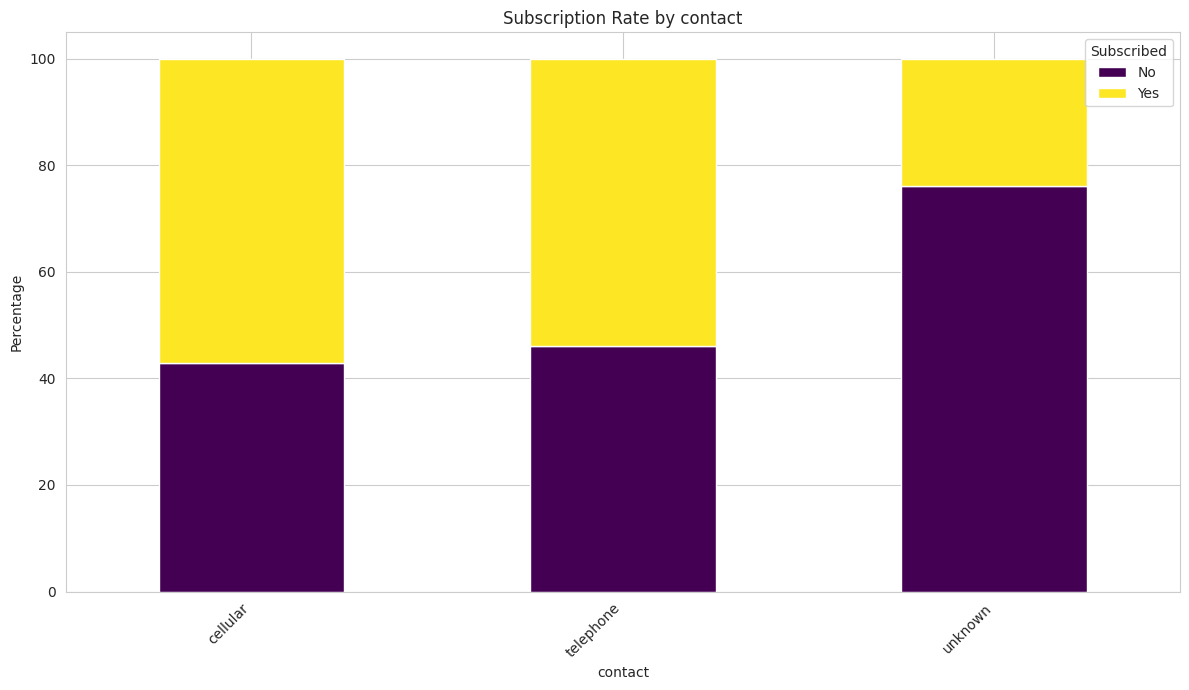

<Figure size 1200x700 with 0 Axes>

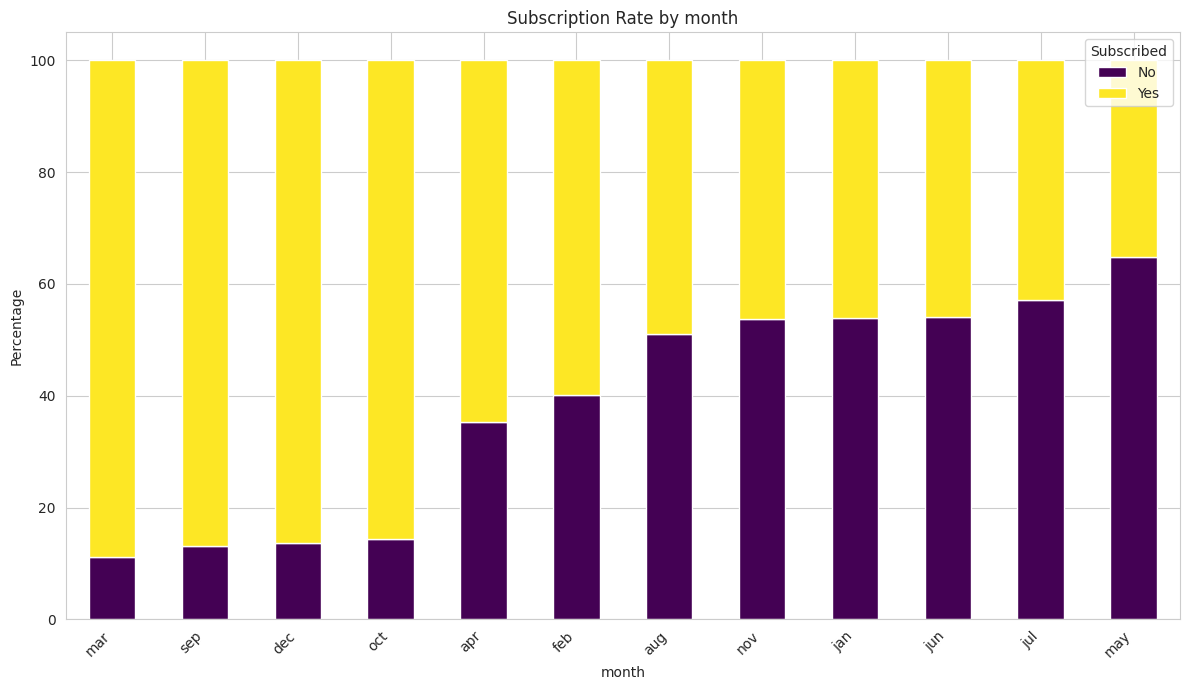

<Figure size 1200x700 with 0 Axes>

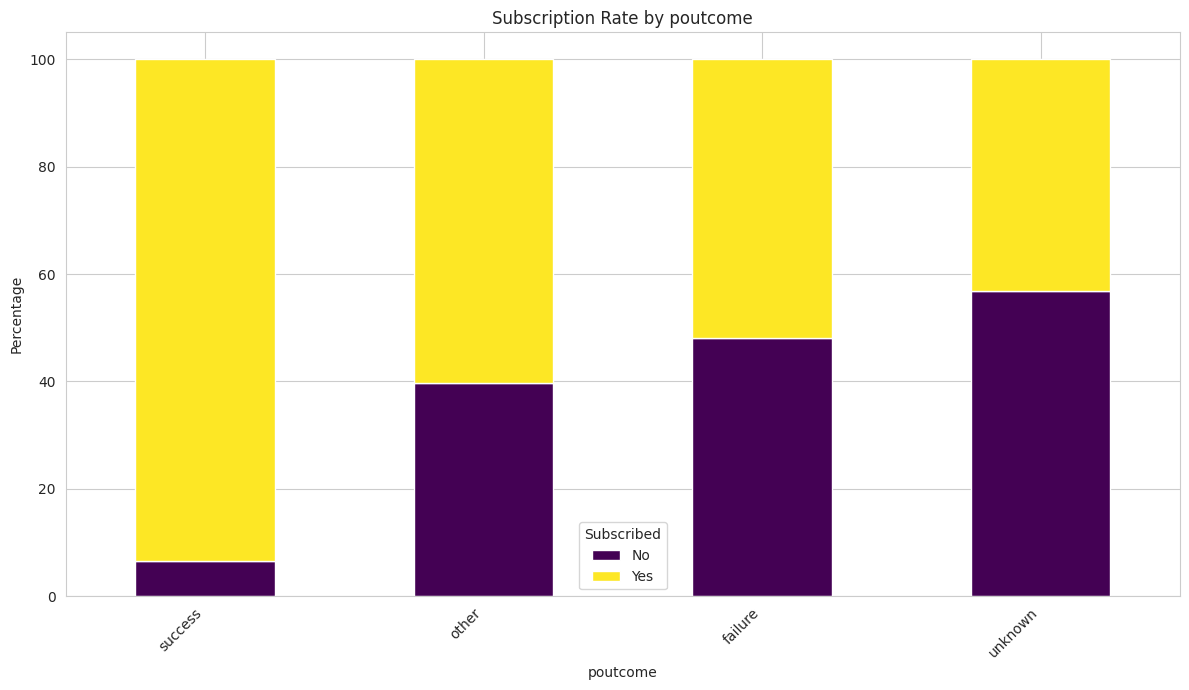

In [ ]:
# --- 3. Exploratory Data Analysis (EDA) ---

print("\n--- Exploratory Data Analysis (EDA) ---")

# --- Descriptive Statistics for Numerical Features ---
print("\nDescriptive Statistics for Numerical Features:")
# Identify numerical columns for description (excluding binary 0/1 columns and target)
numerical_cols_for_desc = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
print(df_upsampled[numerical_cols_for_desc].describe().to_markdown(numalign="left", stralign="left"))

# --- Visualizing Distributions and Outliers for Numerical Features ---
# Set style for plots
sns.set_style("whitegrid")

print("\nVisualizing Distributions and Outliers for Numerical Features (Histograms & Box Plots):")
for col in numerical_cols_for_desc:
    plt.figure(figsize=(15, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_upsampled[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_upsampled[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    # plt.show() # Uncomment to display plots in an interactive environment

# --- Visualizing Distributions for Categorical Features ---
print("\nVisualizing Distributions for Categorical Features (Count Plots):")
# Re-identify original categorical columns that are not binary 0/1 for EDA visuals
# 'contact', 'education', 'job', 'marital', 'month', 'poutcome' are the multi-category ones
categorical_cols_for_eda = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in categorical_cols_for_eda:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_upsampled[col], order=df_upsampled[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    # plt.show() # Uncomment to display plots in an interactive environment

# --- Visualizing Relationship between Categorical Features and Target (y) ---
print("\nVisualizing Relationship between Categorical Features and Target (Subscription Rate by Category):")
for col in categorical_cols_for_eda:
    plt.figure(figsize=(12, 7))
    # Create a cross-tabulation of the categorical feature and the target variable, normalized by row
    ct = pd.crosstab(df_upsampled[col], df_upsampled['y'], normalize='index') * 100
    ct = ct.sort_values(by=1, ascending=False) # Sort by percentage of 'yes' for better visual comparison

    ct.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
    plt.title(f'Subscription Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Subscribed', labels=['No', 'Yes'])
    plt.tight_layout()
    # plt.show() # Uncomment to display plots in an interactive environment

In [ ]:
# --- 4. Final Preprocessing for Model Training ---

print("\n--- Final Preprocessing for Model Training (One-Hot Encoding & Scaling) ---")

# Separate features (X) and target (y)
X = df_upsampled.drop('y', axis=1)
y = df_upsampled['y']

# Apply One-Hot Encoding to remaining categorical columns
# These are the original categorical columns that are not binary and not numerical after initial steps
categorical_cols_for_encoding = X.select_dtypes(include='object').columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols_for_encoding, drop_first=False) # drop_first=False to keep all categories for interpretability initially

print(f"Features (X) shape after one-hot encoding: {X.shape}")
print(f"First 5 rows of prepared features (X):")
print(X.head().to_markdown(index=False, numalign="left", stralign="left"))


# Apply StandardScaler to numerical features (already identified in EDA)
scaler = StandardScaler()
X[numerical_cols_for_desc] = scaler.fit_transform(X[numerical_cols_for_desc])
print(f"Numerical features scaled using StandardScaler.")
print(f"First 5 rows of scaled numerical features:")
print(X[numerical_cols_for_desc].head().to_markdown(index=False, numalign="left", stralign="left"))

# Split the data into training and testing sets
# Stratify by 'y' to maintain class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training (80%) and testing (20%) sets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


--- Final Preprocessing for Model Training (One-Hot Encoding & Scaling) ---
Features (X) shape after one-hot encoding: (79844, 48)
First 5 rows of prepared features (X):
| age   | default   | balance   | housing   | loan   | day   | campaign   | pdays   | previous   | duration_zero   | job_admin.   | job_blue-collar   | job_entrepreneur   | job_housemaid   | job_management   | job_retired   | job_self-employed   | job_services   | job_student   | job_technician   | job_unemployed   | job_unknown   | marital_divorced   | marital_married   | marital_single   | education_primary   | education_secondary   | education_tertiary   | education_unknown   | contact_cellular   | contact_telephone   | contact_unknown   | month_apr   | month_aug   | month_dec   | month_feb   | month_jan   | month_jul   | month_jun   | month_mar   | month_may   | month_nov   | month_oct   | month_sep   | poutcome_failure   | poutcome_other   | poutcome_success   | poutcome_unknown   |
|:------|:----------|:--------

In [ ]:
# --- 5. Model Training (Logistic Regression) ---

print("\n--- Model Training: Logistic Regression ---")
# Initialize the Logistic Regression model
# 'liblinear' solver is good for smaller datasets and handles L1/L2 penalties well
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
model.fit(X_train, y_train)
print("Logistic Regression Model trained successfully.")


--- Model Training: Logistic Regression ---
Logistic Regression Model trained successfully.



--- Model Evaluation ---

Classification Report:
                 precision    recall  f1-score   support

No Subscription       0.67      0.78      0.72      7985
   Subscription       0.74      0.63      0.68      7984

       accuracy                           0.70     15969
      macro avg       0.71      0.70      0.70     15969
   weighted avg       0.71      0.70      0.70     15969


ROC-AUC Score: 0.77

Generating ROC Curve plot...


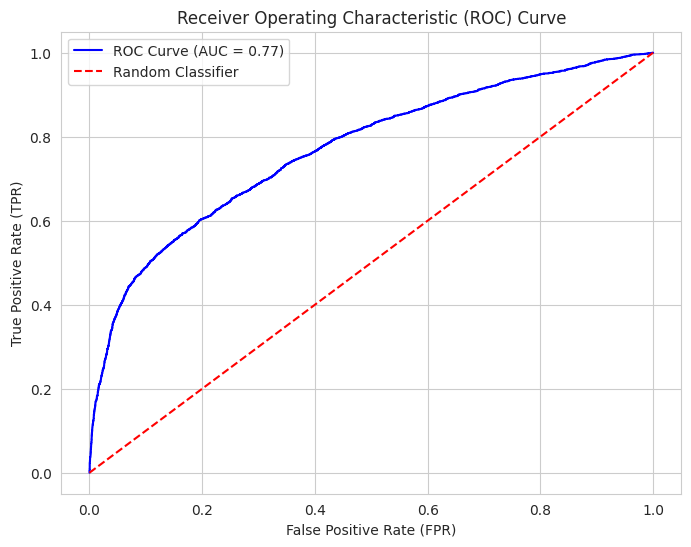

In [ ]:
# --- 6. Model Evaluation ---

print("\n--- Model Evaluation ---")

# Predict on the test data
y_pred = model.predict(X_test)
# Predict probabilities for ROC-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# --- Classification Report ---
print("\nClassification Report:")
# Specify target names for clarity in the report
print(classification_report(y_test, y_pred, target_names=['No Subscription', 'Subscription']))

# --- ROC-AUC Score ---
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# --- Plotting ROC Curve ---
print("\nGenerating ROC Curve plot...")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
# plt.show() # Uncomment to display plot in an interactive environment


--- Feature Importance Analysis (Logistic Regression Coefficients) ---

Top 10 Most Influential Features (sorted by absolute coefficient):

| Feature          | Coefficient   | Absolute_Coefficient   |
|:-----------------|:--------------|:-----------------------|
| poutcome_success | 1.7488        | 1.7488                 |
| month_mar        | 1.26188       | 1.26188                |
| month_oct        | 0.978968      | 0.978968               |
| month_jan        | -0.964342     | 0.964342               |
| month_sep        | 0.847302      | 0.847302               |
| month_nov        | -0.709541     | 0.709541               |
| month_dec        | 0.698818      | 0.698818               |
| month_aug        | -0.697131     | 0.697131               |
| contact_cellular | 0.615198      | 0.615198               |
| contact_unknown  | -0.599116     | 0.599116               |

Generating Top 10 Most Influential Features plot...

--- End of Analysis Code ---


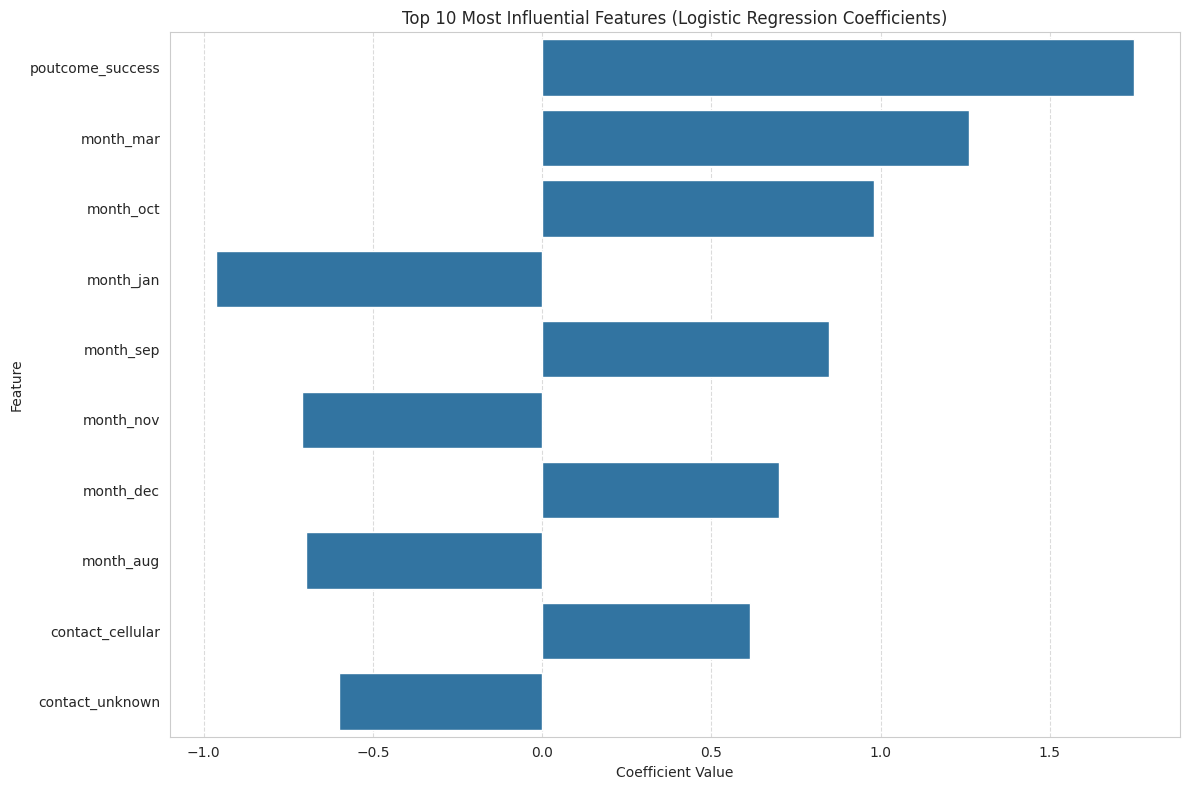

In [28]:
# --- 7. Feature Importance Analysis (from Model Coefficients) ---

print("\n--- Feature Importance Analysis (Logistic Regression Coefficients) ---")

# Get feature names from the processed training data
feature_names = X_train.columns

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate absolute coefficients to identify most impactful features regardless of direction
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])

# Sort features by absolute coefficient in descending order
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top 10 most influential features
print("\nTop 10 Most Influential Features (sorted by absolute coefficient):\n")
print(feature_importance.head(10).to_markdown(index=False, numalign="left", stralign="left"))

# --- Plotting Top 10 Most Influential Features ---
print("\nGenerating Top 10 Most Influential Features plot...")
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Influential Features (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show() # Uncomment to display plot in an interactive environment

print("\n--- End of Analysis Code ---")